A confusion matrix is a table.
It shows how good a machine learning model is at predicting.

The table has rows and columns:

Rows = the real answers (true labels).

Columns = the model’s answers (predicted labels).

For example, imagine we have a model that predicts if an email is spam or not spam.
True Positive (TP): The email was spam, and the model said spam 
True Negative (TN): The email was not spam, and the model said not spam 
False Positive (FP): The email was not spam, but the model said spam 
False Negative (FN): The email was spam, but the model said not spam 


Accuracy shows how many predictions are correct.
correct predictions/all predictions

Precision means: When the model says “Yes”, how many times is it really correct?
Recall means: How many of the real “Yes” cases did the model find?


FP->real , predict


F1 → Balance between precision and recall.

Fβ → Same as F1, but gives more weight to either precision or recall.
The F-score is always between 0 and 1 (or 0% to 100%).

0 → the model is very bad (no correct positive prediction).

1 → the model is perfect (precision = 1 and recall = 1)

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('6-bank_customers.csv')

In [3]:
df.head()

,age,job_satisfaction,balance,duration_last_call,num_contacts_last_month,has_housing_loan,has_personal_loan,communication_type,days_since_last_contact,campaign_response_score,subscribed
0,-0.377957,1.043895,1.043494,-0.101838,-1.617442,0.402713,0.913601,-0.067192,0.175471,-1.049646,0
1,-0.325259,1.276263,-0.686123,-2.463205,-0.489426,-0.240715,-1.469496,1.006633,-0.833692,0.957744,0
2,0.739019,-0.600903,-0.177294,1.335714,-0.817332,-0.790047,1.457365,-0.218981,0.878643,-1.257740,0
3,0.474312,-1.103002,1.189936,-0.800186,0.912377,-0.406451,-1.130950,1.985111,1.379029,1.041768,1
4,0.927365,1.114796,0.080284,1.261064,0.761179,0.921563,0.440832,0.184645,-1.567739,-0.142107,1


In [4]:
df.columns

Index(['age', 'job_satisfaction', 'balance', 'duration_last_call',
       'num_contacts_last_month', 'has_housing_loan', 'has_personal_loan',
       'communication_type', 'days_since_last_contact',
       'campaign_response_score', 'subscribed'],
      dtype='object')

In [5]:
df.describe()

,age,job_satisfaction,balance,duration_last_call,num_contacts_last_month,has_housing_loan,has_personal_loan,communication_type,days_since_last_contact,campaign_response_score,subscribed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.015084,0.031559,0.045069,-0.020771,0.016769,-0.042135,-0.025139,0.058969,-0.015637,0.022327,0.503000
std,1.021848,1.004281,1.006910,1.392738,1.268761,1.029279,1.267490,0.992629,1.000664,1.135131,0.500241
min,-3.718638,-3.116027,-3.534257,-4.999018,-2.587178,-3.250031,-4.932878,-3.187779,-2.819987,-2.071129,0.000000
25%,-0.685005,-0.657545,-0.647051,-1.057938,-0.981320,-0.722970,-0.855392,-0.598669,-0.693330,-1.050201,0.000000
50%,-0.030546,0.045869,0.040586,0.204506,-0.317137,-0.022343,0.148199,0.052208,0.018807,-0.037530,1.000000
75%,0.662124,0.701601,0.731615,1.061181,1.017388,0.596557,1.020255,0.722446,0.641338,0.760782,1.000000
max,2.765266,2.658705,3.357941,3.477210,3.954873,3.206344,2.343380,3.600187,3.477044,4.124285,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1000 non-null   float64
 1   job_satisfaction         1000 non-null   float64
 2   balance                  1000 non-null   float64
 3   duration_last_call       1000 non-null   float64
 4   num_contacts_last_month  1000 non-null   float64
 5   has_housing_loan         1000 non-null   float64
 6   has_personal_loan        1000 non-null   float64
 7   communication_type       1000 non-null   float64
 8   days_since_last_contact  1000 non-null   float64
 9   campaign_response_score  1000 non-null   float64
 10  subscribed               1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [7]:
X=df.drop("subscribed",axis=1)
y=df["subscribed"]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
logistic=LogisticRegression()

In [13]:
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)

In [14]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0], d

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [19]:
score=accuracy_score(y_pred,y_test)
print('score',score) #accuracy
print(classification_report(y_pred,y_test))
print("\n",confusion_matrix(y_pred,y_test))


score 0.9166666666666666
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       160
           1       0.90      0.92      0.91       140

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300


 [[146  14]
 [ 11 129]]


In [20]:
#hyperparameter tuning

In [21]:
model=LogisticRegression()

In [24]:
penalty=['l1','l2','elasticnet']
c_values=[100,10,1,0.1,0.01]
solver=['newton-cg','lbfgs','liblinear','newton-cholesky','sag','saga']



In [28]:
params=dict(penalty = penalty, C = c_values , solver = solver)
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1, 0.1, 0.01],
 'solver': ['newton-cg',
  'lbfgs',
  'liblinear',
  'newton-cholesky',
  'sag',
  'saga']}

In [29]:
#grid search cv
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [30]:
cv=StratifiedKFold()

In [32]:
grid=GridSearchCV(estimator=model,param_grid=params,cv=cv,scoring="accuracy",n_jobs=-1) #n_jobs cpu full kullan

In [34]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [35]:
grid.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
250 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver =

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [36]:
grid.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [37]:
grid.best_score_

0.9242857142857142

In [38]:
y_pred=grid.predict(X_test)


In [39]:
score=accuracy_score(y_pred,y_test)
print('score',score) #accuracy
print(classification_report(y_pred,y_test))
print("\n",confusion_matrix(y_pred,y_test))


score 0.92
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       165
           1       0.89      0.94      0.91       135

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300


 [[149  16]
 [  8 127]]


In [40]:
#random search cv

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
model=LogisticRegression()

In [44]:
randomcv=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,n_iter=10,scoring='accuracy')

In [45]:
randomcv.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [46]:
randomcv.best_params_

{'solver': 'saga', 'penalty': 'l1', 'C': 0.01}

In [47]:
randomcv.best_score_

0.9242857142857142

In [48]:
y_pred=randomcv.predict(X_test)

In [49]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0], d

In [50]:
score=accuracy_score(y_pred,y_test)
print('score',score) #accuracy
print(classification_report(y_pred,y_test))
print("\n",confusion_matrix(y_pred,y_test))

score 0.9133333333333333
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       163
           1       0.89      0.93      0.91       137

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300


 [[147  16]
 [ 10 127]]


In [55]:
#attack type 0->normal 1->DDoS, 2->Port Scan
df=pd.read_csv("7-cyber_attack_data.csv")

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   src_packet_rate              1000 non-null   float64
 1   dst_packet_rate              1000 non-null   float64
 2   avg_payload_size             1000 non-null   float64
 3   connection_duration          1000 non-null   float64
 4   tcp_flag_count               1000 non-null   float64
 5   avg_interarrival_time        1000 non-null   float64
 6   failed_login_attempts        1000 non-null   float64
 7   unusual_port_activity_score  1000 non-null   float64
 8   session_entropy              1000 non-null   float64
 9   avg_response_delay           1000 non-null   float64
 10  attack_type                  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [57]:
df.describe()

,src_packet_rate,dst_packet_rate,avg_payload_size,connection_duration,tcp_flag_count,avg_interarrival_time,failed_login_attempts,unusual_port_activity_score,session_entropy,avg_response_delay,attack_type
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.012296,0.239737,-0.031142,0.013329,0.008900,0.016681,0.026614,0.315347,-0.045636,0.179530,1.003000
std,1.406123,1.635646,0.989677,1.001178,1.000905,1.027824,1.022217,1.364824,1.472316,0.960834,0.817104
min,-4.267039,-7.960328,-3.718638,-3.250031,-3.288725,-3.178790,-3.057529,-4.045045,-5.869039,-4.409592,0.000000
25%,-1.007421,-0.871250,-0.657668,-0.672964,-0.654218,-0.697799,-0.653787,-0.712015,-1.074499,-0.591831,0.000000
50%,0.085888,0.296278,-0.008968,0.045505,-0.032894,0.014639,0.049283,0.567003,0.121580,0.248920,1.000000
75%,1.080743,1.518676,0.615381,0.678219,0.687831,0.703139,0.713809,1.235890,1.013049,0.983239,2.000000
max,3.874738,7.168331,3.206344,2.741943,3.477044,3.600187,3.357941,4.020627,4.986178,4.112542,2.000000


In [58]:
X=df.drop("attack_type",axis=1)
y=df["attack_type"]

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=15)

In [60]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [61]:
y_pred=model.predict(X_test)

In [62]:
y_pred

array([2, 0, 0, 0, 2, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 2,
       1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 2, 1, 2,
       1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1, 2, 2, 0, 2, 2,
       1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1,
       2, 1, 2, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1, 0, 2,
       2, 2, 1, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 1, 1,
       0, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2,
       0, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0,
       1, 2, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       2, 0, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1, 1, 2, 0,
       2, 0, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 2,
       2, 1, 0, 0, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], d

In [63]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [64]:
score=accuracy_score(y_pred,y_test)
print("score",score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

score 0.7866666666666666
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        90
           1       0.74      0.73      0.73        99
           2       0.84      0.74      0.78       111

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300

[[82  2  6]
 [17 72 10]
 [ 6 23 82]]


In [65]:
#one vs rest

In [66]:
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier

In [67]:
onevsone=OneVsOneClassifier(LogisticRegression())

In [68]:
onevsrest=OneVsRestClassifier(LogisticRegression())

In [69]:
onevsone.fit(X_train,y_train)
y_pred=onevsone.predict(X_test)
score=accuracy_score(y_pred,y_test)
print("score",score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
#daha uzun is daha iyi score 

score 0.7966666666666666
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        91
           1       0.74      0.76      0.75        95
           2       0.85      0.73      0.78       114

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300

[[84  3  4]
 [12 72 11]
 [ 9 22 83]]


In [70]:
onevsrest.fit(X_train,y_train)
y_pred=onevsrest.predict(X_test)
score=accuracy_score(y_pred,y_test)
print("score",score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
#daha kısa is biraz dha kotu score

score 0.7833333333333333
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        91
           1       0.71      0.73      0.72        94
           2       0.85      0.72      0.78       115

    accuracy                           0.78       300
   macro avg       0.78      0.79      0.78       300
weighted avg       0.79      0.78      0.78       300

[[83  2  6]
 [16 69  9]
 [ 6 26 83]]


In [71]:
#Logistic Regression Advanced

In [72]:
df=pd.read_csv('8-fraud_detection.csv')
df.head()
#is_fraud dolandırılcılık mı

,transaction_amount,transaction_risk_score,is_fraud
0,1.879910,-1.485035,0
1,0.377083,-2.238585,0
2,1.354312,-2.664638,0
3,-0.509843,-1.502950,0
4,0.863561,-1.906364,0


In [73]:
df.describe()

,transaction_amount,transaction_risk_score,is_fraud
count,10000.000000,10000.000000,10000.000000
mean,0.976419,-1.003136,0.015400
std,0.725346,0.789194,0.123144
min,-3.370100,-3.952121,0.000000
25%,0.505517,-1.538232,0.000000
50%,0.990240,-0.997064,0.000000
75%,1.461125,-0.466221,0.000000
max,3.487193,1.872543,1.000000


In [74]:
df['is_fraud'].unique()

array([0, 1], dtype=int64)

In [75]:
df['is_fraud'].value_counts()

is_fraud
0    9846
1     154
Name: count, dtype: int64

In [76]:
#imbalanced dataset -> duzensiz dagılımlı

In [77]:
df.isnull().sum()

transaction_amount        0
transaction_risk_score    0
is_fraud                  0
dtype: int64

In [79]:
X=df.drop('is_fraud',axis=1)
y=df['is_fraud']

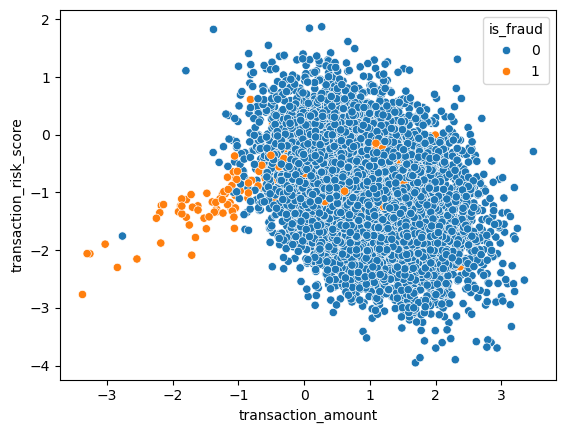

In [82]:
sns.scatterplot(x=X['transaction_amount'],y=X['transaction_risk_score'],hue=y)
plt.show()

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)
from sklearn.linear_model import LogisticRegression


In [84]:
model=LogisticRegression()

In [86]:
penalty=['l1','l2','elasticnet']
c_values=[100,10,1,0.1,0.01]
solver=['newton-cg','lbfgs','liblinear','newton-cholesky','sag','saga']
class_weight=[{0:w, 1:y,} for w in [1,10,50,100] for y in [1,10,50,100]]

In [87]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [88]:
params=dict(penalty=penalty,C=c_values, solver=solver,class_weight=class_weight)
from sklearn.model_selection import GridSearchCV,StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring="accuracy",cv=cv)

In [89]:
import warnings
warnings.filterwarnings("ignore")

In [90]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [91]:
y_pred=grid.predict(X_test)


In [92]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [96]:
print("score",accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))


score 0.99
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2481
           1       0.42      0.84      0.56        19

    accuracy                           0.99      2500
   macro avg       0.71      0.92      0.78      2500
weighted avg       0.99      0.99      0.99      2500

[[2459   22]
 [   3   16]]


In [97]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [98]:
#ROC - AUC 

In [99]:
model_prob=grid.predict_proba(X_test)

In [100]:
model_prob

array([[0.99586436, 0.00413564],
       [0.85287009, 0.14712991],
       [0.952308  , 0.047692  ],
       ...,
       [0.98898975, 0.01101025],
       [0.98454137, 0.01545863],
       [0.99758734, 0.00241266]])

In [101]:
model_prob=model_prob[:,1] #probabilities for the positive(fraud) class

In [102]:
model_prob

array([0.00413564, 0.14712991, 0.047692  , ..., 0.01101025, 0.01545863,
       0.00241266])

In [103]:
from sklearn.metrics import roc_curve,roc_auc_score

In [105]:
model_auc=roc_auc_score(y_test,model_prob)
model_auc

0.7392898371029116

In [110]:
model_fpr,model_tpr,thresholds=roc_curve(y_test,model_prob) 
#model false positive rate
#model true positive rate
#threshold

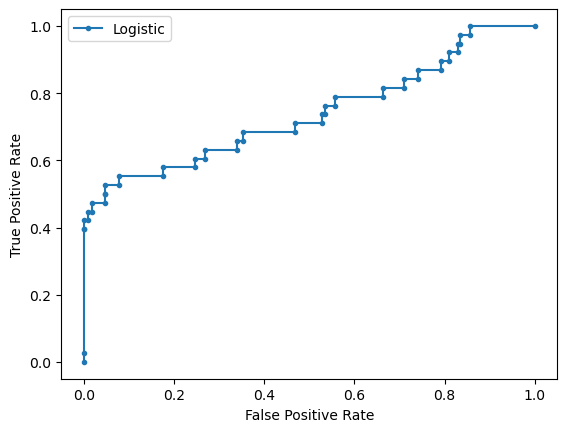

In [111]:
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

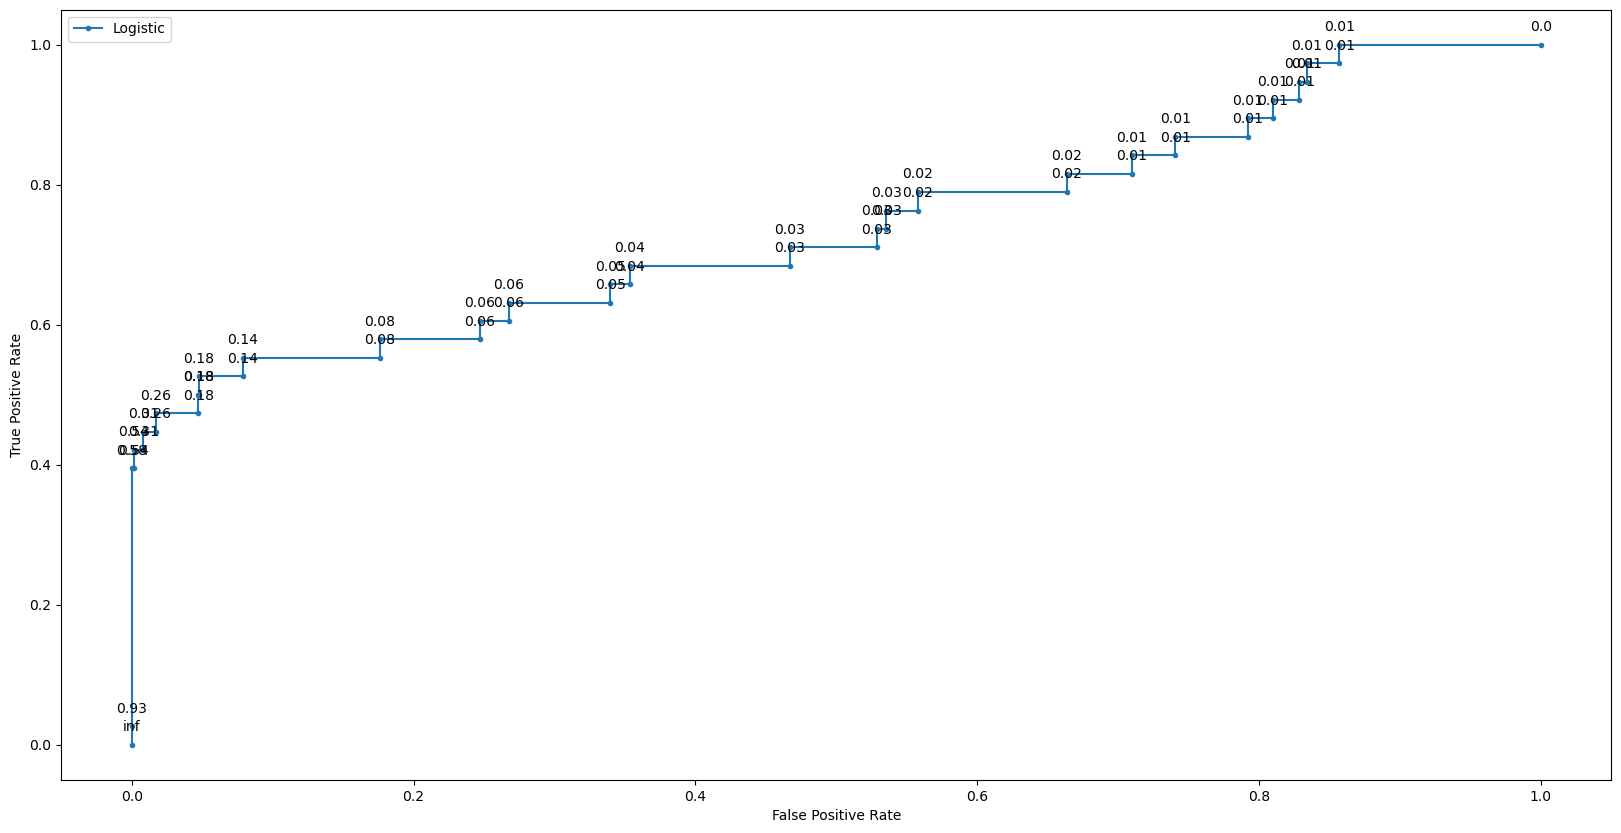

In [112]:
fig,ax=plt.subplots(figsize=(20,10))

ax.plot(model_fpr, model_tpr, marker='.', label='Logistic')

for fpr,tpr,thresh in zip(model_fpr,model_tpr,thresholds):
     ax.annotate(f'{np.round(thresh, 2)}', (fpr, tpr), textcoords="offset points", xytext=(0,10), ha='center')

# axis labels
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
# show the legend
ax.legend()
# show the plot
plt.show()

In [114]:
# Pick a custom threshold (e.g., from your annotated ROC curve)
custom_threshold = 0.5  # You can change this to what you chose

# Predict using custom threshold
y_pred_custom = (model_prob >= custom_threshold).astype(int)
print(model_prob >= custom_threshold)
print(y_pred_custom)

# Evaluate
print(f"\n Evaluation using custom threshold = {custom_threshold}")
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))

[False False False ... False False False]
[0 0 0 ... 0 0 0]

 Evaluation using custom threshold = 0.5
[[2459    3]
 [  22   16]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2462
           1       0.84      0.42      0.56        38

    accuracy                           0.99      2500
   macro avg       0.92      0.71      0.78      2500
weighted avg       0.99      0.99      0.99      2500

